In [0]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime, pytz
from sklearn.ensemble import RandomForestRegressor

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
gdp=pd.read_csv('/content/gdrive/My Drive/GDP  - GDP .csv')

In [4]:
gdp

,Year,Population,Literacy rate,export,imports,GDP
0,1897,1.000035,24.063592,1.313500e+09,2.249400e+09,3.722743
1,1898,1.000835,24.263592,1.382400e+09,2.213300e+09,2.931128
2,1899,1.005835,24.463592,1.389400e+09,2.311200e+09,5.994353
3,1900,1.004835,24.663592,1.576300e+09,2.438800e+09,7.452950
4,1901,1.006835,24.963592,1.691700e+09,2.661100e+09,-2.635770
...,...,...,...,...,...,...
119,2016,1.089880,72.372990,2.620000e+11,3.560000e+11,8.169527
120,2017,1.062597,73.372990,2.960000e+11,4.430000e+11,7.167889
121,2018,1.037323,74.372990,2.960000e+11,4.470000e+11,6.811369
122,2019,1.038666,74.972890,2.960000e+11,4.530000e+11,4.288968


In [5]:
sum1=0
for i in gdp['GDP']:
  m=int(i)
  sum1=sum1+m
q=sum1/len(gdp['GDP'])
for i in gdp.columns:
    gdp[i][gdp[i]<0]=q

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [6]:
gdp

,Year,Population,Literacy rate,export,imports,GDP
0,1897,1.000035,24.063592,1.313500e+09,2.249400e+09,3.722743
1,1898,1.000835,24.263592,1.382400e+09,2.213300e+09,2.931128
2,1899,1.005835,24.463592,1.389400e+09,2.311200e+09,5.994353
3,1900,1.004835,24.663592,1.576300e+09,2.438800e+09,7.452950
4,1901,1.006835,24.963592,1.691700e+09,2.661100e+09,4.443548
...,...,...,...,...,...,...
119,2016,1.089880,72.372990,2.620000e+11,3.560000e+11,8.169527
120,2017,1.062597,73.372990,2.960000e+11,4.430000e+11,7.167889
121,2018,1.037323,74.372990,2.960000e+11,4.470000e+11,6.811369
122,2019,1.038666,74.972890,2.960000e+11,4.530000e+11,4.288968


In [7]:
gdp.head()

,Year,Population,Literacy rate,export,imports,GDP
0,1897,1.000035,24.063592,1.313500e+09,2.249400e+09,3.722743
1,1898,1.000835,24.263592,1.382400e+09,2.213300e+09,2.931128
2,1899,1.005835,24.463592,1.389400e+09,2.311200e+09,5.994353
3,1900,1.004835,24.663592,1.576300e+09,2.438800e+09,7.452950
4,1901,1.006835,24.963592,1.691700e+09,2.661100e+09,4.443548


In [8]:
gdp.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           124 non-null    int64  
 1   Population     124 non-null    float64
 2   Literacy rate  124 non-null    float64
 3   export         124 non-null    float64
 4   imports        124 non-null    float64
 5   GDP            124 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 5.9 KB


In [9]:
gdp.tail()

,Year,Population,Literacy rate,export,imports,GDP
119,2016,1.089880,72.37299,2.620000e+11,3.560000e+11,8.169527
120,2017,1.062597,73.37299,2.960000e+11,4.430000e+11,7.167889
121,2018,1.037323,74.37299,2.960000e+11,4.470000e+11,6.811369
122,2019,1.038666,74.97289,2.960000e+11,4.530000e+11,4.288968
123,2020,1.037357,75.14698,2.990000e+11,4.550000e+11,1.956479


Text(0, 0.5, 'GDP')

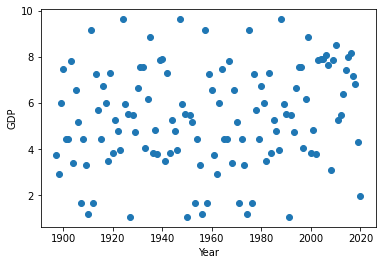

In [10]:
plt.scatter(gdp.Year, gdp.GDP	)
plt.xlabel('Year')
plt.ylabel('GDP')

Text(0, 0.5, 'Population')

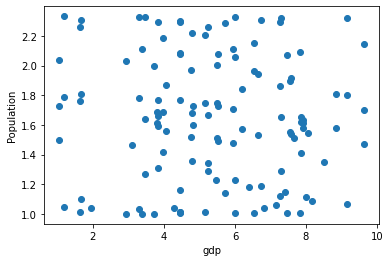

In [11]:
plt.scatter(gdp.GDP, gdp.Population	)
plt.xlabel('gdp')
plt.ylabel('Population')

# **Logical Regression Method:**

In [0]:
x=gdp[['Year','Population','Literacy rate','export','imports']]
y=gdp['GDP']

In [48]:
x.shape

(124, 5)

In [49]:
y.shape

(124,)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [51]:
print(x_train.shape,y_train.shape)

(86, 5) (86,)


In [52]:
print(x_test.shape)

(38, 5)


In [53]:
print(y_test.shape)

(38,)


In [0]:
model= LinearRegression()

In [55]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
prediction=model.predict(x_test)

In [57]:
y_test=np.array(y_test)
predictions=np.array(predictions)
errors = np.sqrt(np.mean(np.square(predictions.reshape(-1,1) - y_test.reshape(-1,1) )))
print('RMSE:', errors)
print('R^2 Score - Coefficient of Determination', model.score(x_test, y_test))

RMSE: 2.112787828800119
R^2 Score - Coefficient of Determination -0.05354441151664079


In [0]:
gdp1=gdp[gdp['Year'] == 1900]

In [59]:
gdp1

,Year,Population,Literacy rate,export,imports,GDP
3,1900,1.004835,24.663592,1.576300e+09,2.438800e+09,7.45295


In [60]:
gdp1['GDP']

3    7.45295
Name: GDP, dtype: float64

In [61]:
z=np.array(y_test)
print(z)

[8.06073257 4.04982085 7.54952225 4.44354839 4.82396626 7.2888929
 3.80397532 3.96535563 4.44354839 5.45635895 6.65892407 5.53345456
 3.47573324 5.99435326 3.38792918 7.92343062 2.93112774 1.18533626
 6.81136933 3.96535563 7.92293661 1.95647892 5.94734333 1.18533626
 7.92293661 1.66310364 7.86038148 6.00620362 5.53345456 3.29552113
 8.4975847  5.71253209 3.29552113 3.82073786 7.2888929  3.29552113
 7.16788886 4.44354839]


In [62]:
prediction

array([6.168724  , 5.07653706, 5.36740833, 5.313526  , 5.42302951,
       5.51963535, 5.45045169, 4.96519827, 5.58049495, 6.3317029 ,
       5.63438964, 4.34683937, 5.38186453, 5.41044138, 5.44769344,
       6.07500166, 5.4457052 , 5.79303038, 6.56384042, 5.34422073,
       5.96023106, 6.60361716, 4.30932892, 5.89271477, 5.47053307,
       5.73669372, 5.87028495, 5.58056794, 5.96450987, 4.94909071,
       6.22021753, 5.27104023, 5.8806417 , 5.14668887, 5.2124369 ,
       5.79219483, 6.54905559, 5.8209806 ])

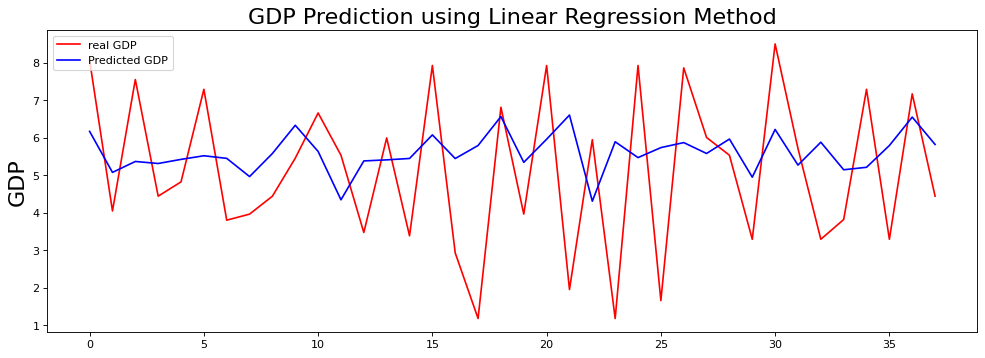

In [64]:
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(z, color = 'red', label = 'real GDP')
plt.plot(prediction, color = 'blue', label = 'Predicted GDP')
plt.title('GDP Prediction using Linear Regression Method', fontsize=20)
plt.ylabel('GDP', fontsize=20)
plt.legend(loc=2, prop={'size': 10})
plt.show()

In [65]:
from sklearn.metrics.regression import r2_score
r2_score(y_test, prediction)

-0.0535444115166408

# **Random Forest Method:**

In [0]:
def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

In [0]:
x=gdp[['Year','Population','Literacy rate','export','imports']]
y=gdp['GDP']

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [69]:
rf = RandomForestRegressor(n_estimators=10000, random_state = None, bootstrap=True, ccp_alpha=0.0, max_depth=None, max_features='auto', verbose=0)
rf.fit(x_train, np.ravel(y_train))
predictions = rf.predict(x_test)
y_test=np.array(y_test)
predictions=np.array(predictions)
errors = np.sqrt(np.mean(np.square(predictions.reshape(-1,1) - y_test.reshape(-1,1) )))
print('RMSE:', errors)
print('R^2 Score - Coefficient of Determination', rf.score(x_test, y_test))

RMSE: 2.4083298324721274
R^2 Score - Coefficient of Determination -0.36890404197095483


In [72]:
gdp_Result = pd.DataFrame(y_test, index=x_test.index, columns=["Original"])
gdp_Result['Predicted'] = predictions
gdp_Result.tail(3)

,Original,Predicted
12,3.295521,4.597947
120,7.167889,6.194001
11,4.443548,4.984827


In [75]:
m=np.array(gdp_Result['Original'])
n=np.array(gdp_Result['Predicted'])
print(m)
print(n)

[8.06073257 4.04982085 7.54952225 4.44354839 4.82396626 7.2888929
 3.80397532 3.96535563 4.44354839 5.45635895 6.65892407 5.53345456
 3.47573324 5.99435326 3.38792918 7.92343062 2.93112774 1.18533626
 6.81136933 3.96535563 7.92293661 1.95647892 5.94734333 1.18533626
 7.92293661 1.66310364 7.86038148 6.00620362 5.53345456 3.29552113
 8.4975847  5.71253209 3.29552113 3.82073786 7.2888929  3.29552113
 7.16788886 4.44354839]
[6.74112201 6.66441318 6.79417747 5.75968151 5.16795261 4.74289073
 6.07686272 5.47870234 6.01946684 5.81415223 5.83983703 3.89795367
 4.01631997 5.62947226 6.51716104 6.05319669 5.19796908 7.12385241
 5.44690856 5.60080994 5.24625215 5.44820853 4.55197794 7.15810071
 6.45880687 7.84288482 4.48007628 5.08393536 3.71618298 4.96579796
 6.4406471  5.98229051 4.58563403 5.33420238 5.29525945 4.5979468
 6.19400143 4.98482674]


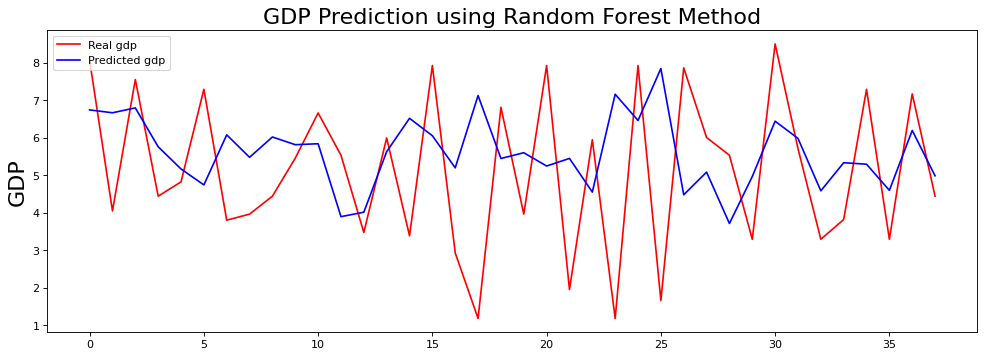

In [76]:
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(m, color = 'red', label = 'Real gdp')
plt.plot(n, color = 'blue', label = 'Predicted gdp')
plt.title('GDP Prediction using Random Forest Method', fontsize=20)
plt.ylabel('GDP', fontsize=20)
plt.legend(loc=2, prop={'size': 10})
plt.show()

In [77]:
from sklearn.metrics.regression import r2_score
r2_score(y_test, predictions)

-0.36890404197095483

# **SVM(Support Vector Machine) Method:**


In [0]:
x=gdp[['Year','Population','Literacy rate','export','imports']]
y=gdp['GDP']

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [80]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)
y_test=np.array(y_test)
pred=np.array(pred)
errors = np.sqrt(np.mean(np.square(pred.reshape(-1,1) - y_test.reshape(-1,1) )))
print('RMSE:', errors)
print('R^2 Score - Coefficient of Determination', regressor.score(x_test, y_test))

RMSE: 1.9442202212384223
R^2 Score - Coefficient of Determination 0.10786210606345782


In [82]:
z=np.array(y_test)
print(z)

[8.06073257 4.04982085 7.54952225 4.44354839 4.82396626 7.2888929
 3.80397532 3.96535563 4.44354839 5.45635895 6.65892407 5.53345456
 3.47573324 5.99435326 3.38792918 7.92343062 2.93112774 1.18533626
 6.81136933 3.96535563 7.92293661 1.95647892 5.94734333 1.18533626
 7.92293661 1.66310364 7.86038148 6.00620362 5.53345456 3.29552113
 8.4975847  5.71253209 3.29552113 3.82073786 7.2888929  3.29552113
 7.16788886 4.44354839]


In [83]:
pred

array([6.8080554 , 5.4885557 , 5.4618399 , 5.34390541, 5.54271441,
       5.36824552, 5.54166497, 5.21567081, 5.31878095, 6.16051622,
       5.40888264, 5.07208795, 5.36824552, 5.31758588, 5.31775458,
       6.34948729, 5.31720935, 5.31986173, 6.4946601 , 5.36529598,
       5.92134961, 6.42057281, 5.08712792, 5.47286466, 5.7030006 ,
       5.33051111, 5.7030006 , 5.36457346, 5.40367044, 5.31986173,
       7.44249553, 5.33591779, 5.4644343 , 5.27625449, 5.29698375,
       5.31642209, 6.5292023 , 5.31721649])

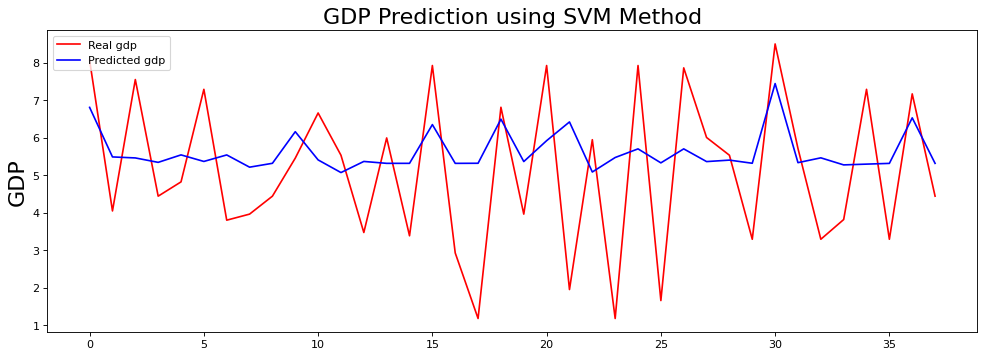

In [84]:
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(z, color = 'red', label = 'Real gdp')
plt.plot(pred, color = 'blue', label = 'Predicted gdp')
plt.title('GDP Prediction using SVM Method', fontsize=20)
plt.ylabel('GDP', fontsize=20)
plt.legend(loc=2, prop={'size': 10})
plt.show()

In [85]:
from sklearn.metrics.regression import r2_score
r2_score(y_test, pred)

0.10786210606345781